<a href="https://colab.research.google.com/github/enesergen/TensorflowFundamentalCourseWithDaniel/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Veri görüntüleme ve fit etme

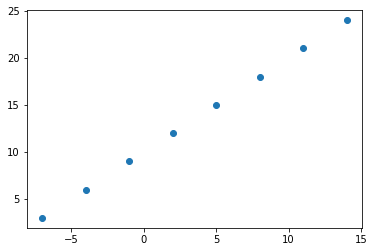

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create future
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
#create label
y=np.array([3.,6.,9.,12.,15.,18.,21.,24.])
#görselleştirme
plt.scatter(X,y)

In [3]:
y==X+10#x ve y arasındaki ilişki

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input ve Output Shapes

In [4]:
#house price prediction problem için bir tensor oluşturalım
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
#Numpy array leri tensor a dönüştürme
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Tensorflow ile modelleme stepleri
1. Model oluşturma - input , output  , hidden layerleri tanımlama
2. Compile the model -loss function ve optimizer tanımlama
3. Fitting the model -



In [6]:
tf.random.set_seed(42)#set global random seed
#model oluşturma
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)#1 input ve 1 output olduğu için
])
#compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
#X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
#modele tahmin ettirme
model.predict([17]) #çok doğru tahminler yapamıyor malesef şuan için mae 8.6 yüksek bir değer şuan için 

1/1 [==============================] - 0s 147ms/step


array([[12.716021]], dtype=float32)

# Improving our model , modelimizi geliştirme kısmı
We can improve our model ,by altering the steps we took to create a model.
1. **Creating a model** -> We might add more layers,increase the number of hidden units(also called neurons) within each of the hidden layers , we might change the activation function of each layer.

2. **Compiling a model** -> We might change the optimizer function or perhaps the learning rate of the optimization function.

3. **Fitting the model** -> we might fit a model for more epochs or on more data.

In [9]:
#Lets rebuild our model
#creat the model 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 515ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [10]:
model.predict([17]) 

1/1 [==============================] - 0s 166ms/step


array([[29.739855]], dtype=float32)

#Learning rate is most important hyperparameter in NN

In [11]:
#Lets see if we make another change to improve our model

#creating the model with extra hidden layer with 100 hidden units
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#compiling the model 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1687 - mae: 9.1687
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 7.0477 - mae: 7.0477
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.4551 - mae: 7.4551
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7955 - mae: 7.7955
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.8032 - mae: 7.8032
Epoch 11/100
1/1 [==============================] - 0s 12ms/st

In [12]:
model.predict([17.])#activation function none , optimizer adam and learning rate 0.01 olarak değiştirildi


1/1 [==============================] - 0s 140ms/step


array([[26.485748]], dtype=float32)

#Evaluating the model 
1. Veriyi görselleştirme
2. Modeli görselleştirme


In [13]:
X=tf.cast(tf.range(-100,100,4),dtype=tf.float32)
X#dataset

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [14]:
y=X+10
y#label

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

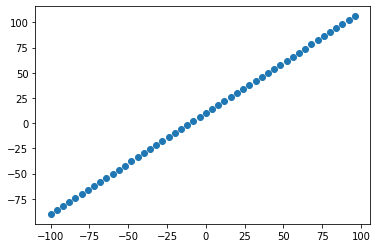

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The three sets...
* Training set ->  the model learns from this data which is 70-80% of available data.
* Validation set is 10-15% of available data
* Test set -> the model gets evaluated on this data to test what is has learned. this set is 10-15% of available data

In [16]:
len(X)

50

In [17]:
#veriseti küçük olduğu için validation seti bu seferlik atlıyoruz
#split the data into train and test set
X_train=X[:40]#ilk 40 
y_train=y[:40]

X_test=X[40:]#kalan yüzde 10 kısmı
y_test=y[40:]

###visualizing the data

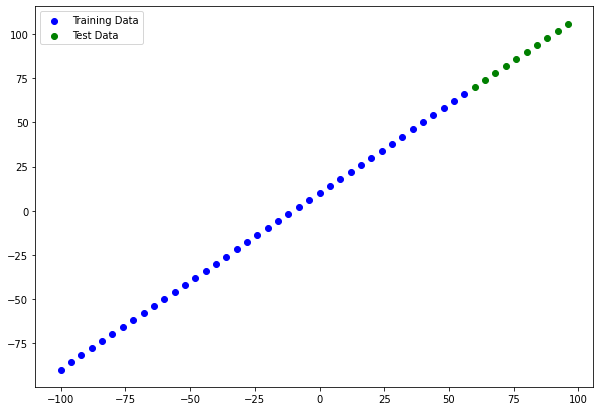

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.legend()

In [19]:
#build the  NN model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# Visualizing the model

In [20]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])#yukardaki ile aynı sadece input shape verdik

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

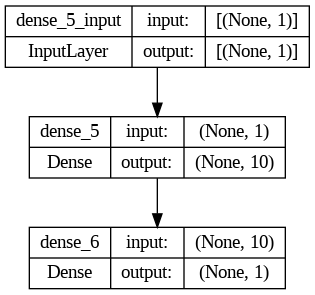

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)


# Visualizing our model's predictions

In [24]:
y_pred=model.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 86ms/step


(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [25]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

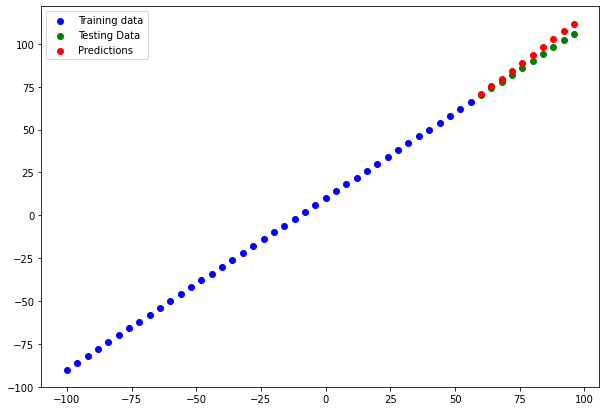

In [26]:
plot_predictions()

# Evaluating our model's predictions with regression evaluating metrics


In [27]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 221ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [28]:
y_test,y_pred

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>, array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32))

In [29]:
#calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred)))#squeeze 1 olan boyutları silyor (10,) shape olur
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [30]:
#calculate the mean square error
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [31]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred)))

def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))

### Running experiments to improve our model 


In [32]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

**Build model_1**

In [33]:
tf.random.set_seed(42)
#create model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
#fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 74ms/step


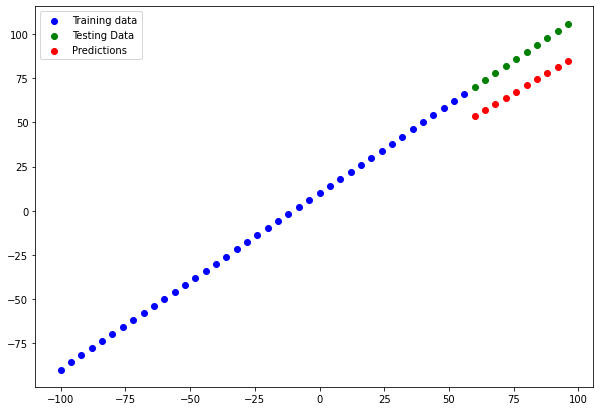

In [34]:
#make and plot prediction model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [35]:
#calculate model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

In [36]:
tf.random.set_seed(42)
#create model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])

#fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 67ms/step


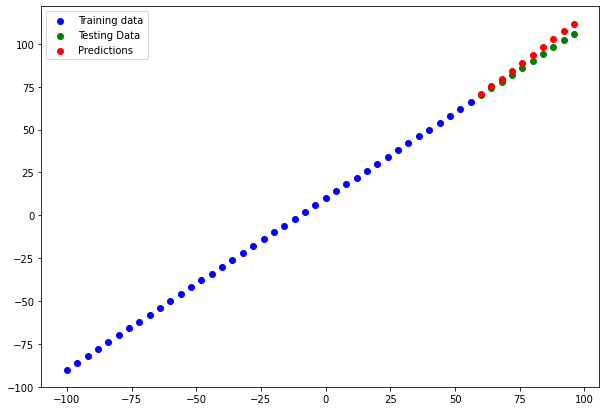

In [37]:
#make and plot predictions of model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [38]:
#calculate model_2 evaluation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build model_3**

In [39]:
tf.random.set_seed(42)
#create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])

#fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 15ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/500
2/2 [===================

1/1 [==============================] - 0s 130ms/step


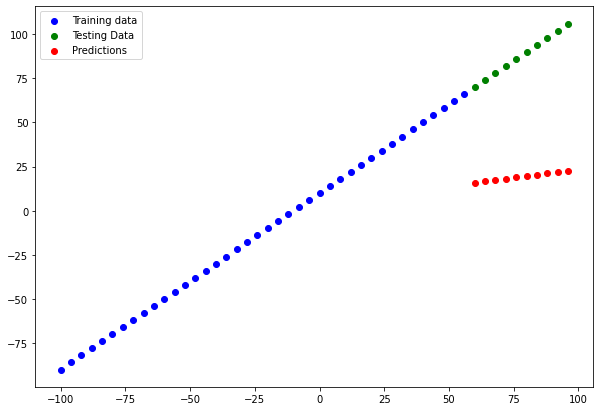

In [40]:
#make and plat predictions of model_3
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [41]:
#calculate evaluatin metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of our experiments

In [42]:
#lets compare the result of our models using pandas dataframe
import pandas as pd
model_results=[["Model_1",mae_1.numpy(),mse_1.numpy()],
               ["Model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,Model_1,18.745327,353.573364
1,Model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [43]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Saving our models

In [44]:
model_2.save("best_model_SavedModel_format")#SavedModel format

In [45]:
model_2.save("best_model_HDF5_format.h5")

#Loading in a saved model

In [46]:
loaded_SavedModel_format=tf.keras.models.load_model("best_model_SavedModel_format")#savedmodel format
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
loaded_HDF5_format=tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [48]:
#compare model_2 predictions with SavedModel format model
model_2_preds=model_2.predict(X_test)
savedmodel_format_preds=loaded_SavedModel_format.predict(X_test)
model_2_preds==savedmodel_format_preds

1/1 [==============================] - 0s 90ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

##Download the model
*3 türlü indirilebilir*
1. files menüsünden download tıklayarak
2. Code ile colab kütüphanesini kullanarak 
3. Google drive aracılığıyla

In [49]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
#saving a file to google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow_Course

In [51]:
!ls /content/drive/MyDrive/Tensorflow_Course

best_model_HDF5_format.h5


##A larger example

In [52]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
#read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
#categorical varianle olan sex smoker gibi alanları one hot encoding ile numerical hale dönüştürelim
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [55]:
#Create X andd y
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [56]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [57]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [58]:
#create train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
#build a neural network
tf.random.set_seed(42)
#create model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7493.1743 - mae: 7493.1743

In [60]:
#check the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

Modelimiz çok doğru çalışmıyor gibi hata payı yüksek.
Modelimizi geliştirmek için şu iki adımı uygulayalım.
1. Ekstra gizli katman ekleyelim.Optimizer değiştirelim.
2. Daha fazla train ettirelim.

In [67]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),#extra layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),#change optimizer
                        metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [68]:
#evaluate the model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [69]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [83]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history=insurance_model_3.fit(X_train,y_train,epochs=450,verbose=0)

In [78]:
#çok daha iyi değer aldık
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 13ms/step - loss: 3488.7854 - mae: 3488.7856


In [85]:
#comparing the models
insurance_model.evaluate(X_test,y_test),insurance_model_2.evaluate(X_test,y_test),insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.4648 - mae: 3161.4648


([7023.32861328125, 7023.32861328125],
 [4924.49560546875, 4924.49560546875],
 [3161.46484375, 3161.46484375])

Text(0.5, 0, 'Epochs')

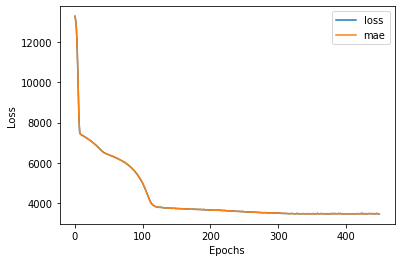

In [84]:
#plot history (also knonw error(loss) curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Bir soru ?
**Ne zamana kadar train etmeye devam etmeliyiz?**
Tamamen probleme bağlıdır.
Buna ek olarak bir tensorflow componenti var bu component daha erken train işlemini durdurmayı sağlar.
Source=https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


## Preprocessing data are normalization and standardization
we are focus on narmalization(between 0 and 1)

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
#create a column transformer 
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),#değerleri 0 ile 1 arasında değerlere dönüştürür
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
#Create X and y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

#build train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)#burada amaç x_traindeki kolonlar hakkında bilgi sahibi olsun diye yukarıda bazı kolonları bildirdik burada tüm kolonlardan haberdar olacak ct.

#transforming training and test data with normalization
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [98]:
#what does our data look like ?
X_train_normal[0]#neural network için hazır bir data

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [99]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Datamız normalize edildi one hot encoding yapıldı.
Şimdi neural network modelimizi build edelim.

In [104]:
tf.random.set_seed(42)

#create the model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
#fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [105]:
#evaluate the model
insurance_model_4.evaluate(X_test_normal,y_test)#aynı değerler ile normalizatiın farkı burada

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
#Insurance_model_2
#9/9 [==============================] - 0s 4ms/step - loss: 7023.3286 - mae: 7023.3286
#[7023.32861328125, 7023.32861328125]

In [86]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


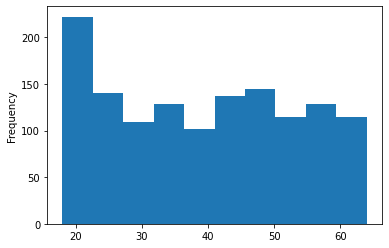

In [88]:
X["age"].plot(kind="hist")

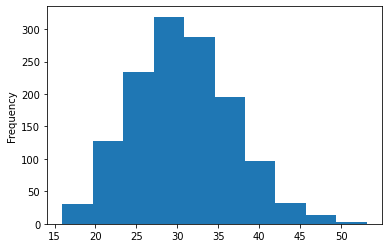

In [89]:
X["bmi"].plot(kind="hist")

In [90]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64